In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
weights_df = pd.read_csv("../1. Inspect, Clean and Validate Dataset/CleanedData/Cleaned_WeightsAndCalories_IncEstimated.csv")

In [24]:
weights_df

,Date,"Weight, kg",BMI,Body Fat Percentage,Muscle Percentage,RMI,Visceral Fat Percentage,Calories In
0,17/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0
1,18/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0
2,19/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0
3,20/12/2020,51.3,17.2,5.5,47.3,1383.0,1.0,1500.0
4,21/12/2020,51.4,17.2,5.2,47.7,1388.0,1.0,600.0
...,...,...,...,...,...,...,...,...
1358,11/08/2025,66.2,22.4,20.1,40.5,1606.0,5.0,2653.0
1359,12/08/2025,66.5,22.5,19.8,40.8,1614.0,5.0,2786.0
1360,13/08/2025,66.8,22.6,19.5,40.1,1622.0,5.0,2890.0
1361,14/08/2025,67.2,22.7,19.2,41.3,1629.0,5.0,2895.0


In [25]:
weights_df["Body Fat, kg"] = weights_df["Weight, kg"] * weights_df["Body Fat Percentage"] / 100
weights_df["Muscle Mass, kg"] = weights_df["Weight, kg"] * weights_df["Muscle Percentage"] / 100
weights_df["Visceral Fat, kg"] = weights_df["Weight, kg"] * weights_df["Visceral Fat Percentage"] / 100

KG_TO_LBS = 2.2046226218
weights_df["Muscle Mass, lbs"] = weights_df["Muscle Mass, kg"] * KG_TO_LBS
weights_df["Body Fat, lbs"] = weights_df["Body Fat, kg"] * KG_TO_LBS
weights_df["Lean / Body Fat, lbs"] = ((weights_df["Weight, kg"]-weights_df["Body Fat, kg"]) / (weights_df["Body Fat, kg"])) * KG_TO_LBS

AttributeError: 'Axes' object has no attribute 'xticks'

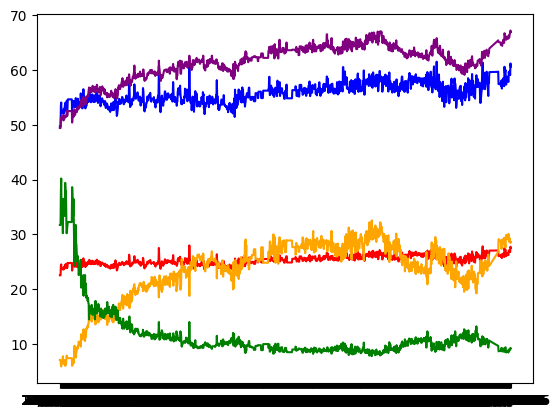

In [50]:
figure = plt.figure()
ax = figure.add_subplot()
x_values = weights_df["Date"]

# x_labels = []
# for i, row in weights_df.iterrows():
# 	if i % 10:
# 		x_labels.append(row["Date"])

ax.plot(x_values, weights_df["Muscle Mass, lbs"], color="Blue")
ax.plot(x_values, weights_df["Muscle Mass, kg"], color="Red")
ax.plot(x_values, weights_df["Body Fat, lbs"], color="Orange")
ax.plot(x_values, weights_df["Lean / Body Fat, lbs"], color="Green")
ax.plot(x_values, weights_df["Weight, kg"], color="Purple")

tick_every_x = 100
tick_positions = weights_df["Date"][::tick_every_x]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, 90)

ax.legend(["Muscle Mass, lbs", "Muscle Mass, kg", "Body Fat, lbs", "Lean / Body Fat, lbs", "Weight, kg"], bbox_to_anchor=(1.05, 1))

figure.save("./Charts/Body Composition.png", dpi=1000)